<a href="https://colab.research.google.com/github/GeraldineVazquez/EDP-2-/blob/main/Diferencias_Progresivas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Comparación de soluciones numéricas y exactas 
 x_i   u(x_i,0.5)  w_i (k=0.0005)  |Error| (k=0.0005)   w_i (k=0.01)  |Error| (k=0.01)
 0.0 0.000000e+00        0.000000        0.000000e+00       0.000000      0.000000e+00
 0.1 2.222414e-03        0.002287        6.410661e-05 -164112.188243      1.641122e+05
 0.2 4.227283e-03        0.004349        1.219380e-04  316044.702526      3.160447e+05
 0.3 5.818356e-03        0.005986        1.678333e-04 -443326.698195      4.433267e+05
 0.4 6.839888e-03        0.007037        1.972999e-04  533499.804456      5.334998e+05
 0.5 7.191883e-03        0.007399        2.074533e-04 -575336.818078      5.753368e+05
 0.6 6.839888e-03        0.007037        1.972999e-04  560857.196577      5.608572e+05
 0.7 5.818356e-03        0.005986        1.678333e-04 -487591.888491      4.875919e+05
 0.8 4.227283e-03        0.004349        1.219380e-04  360309.892823      3.603099e+05
 0.9 2.222414e-03        0.002287        6.410661e-05 -191469.580365      1.914696

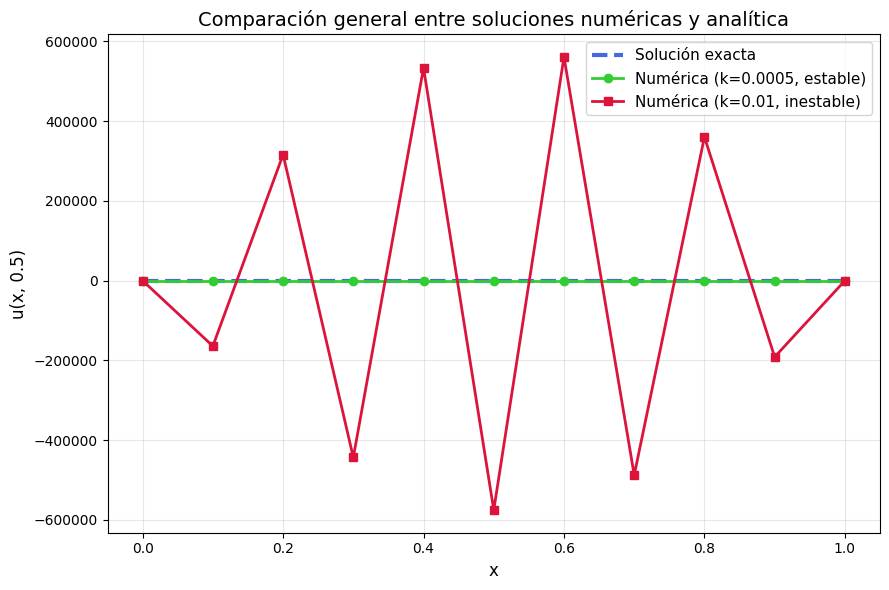

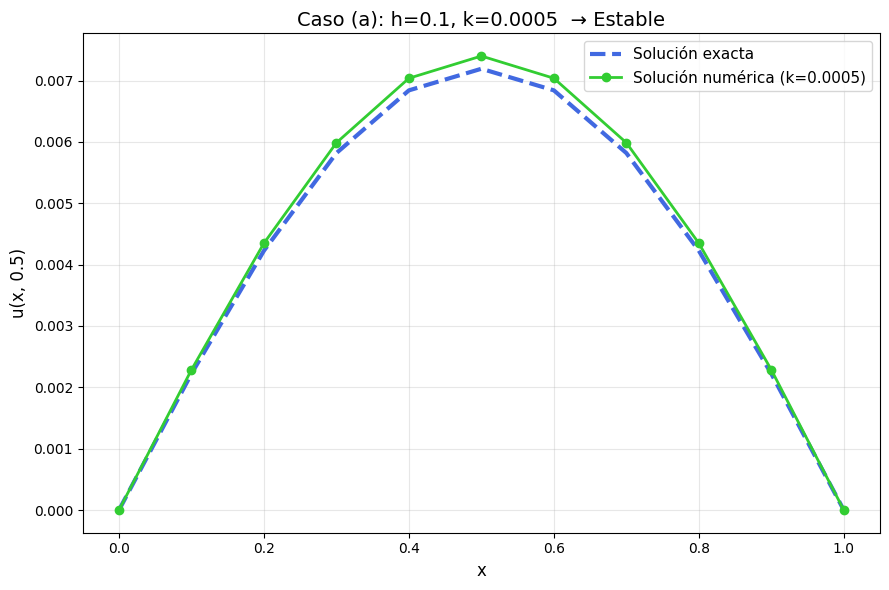

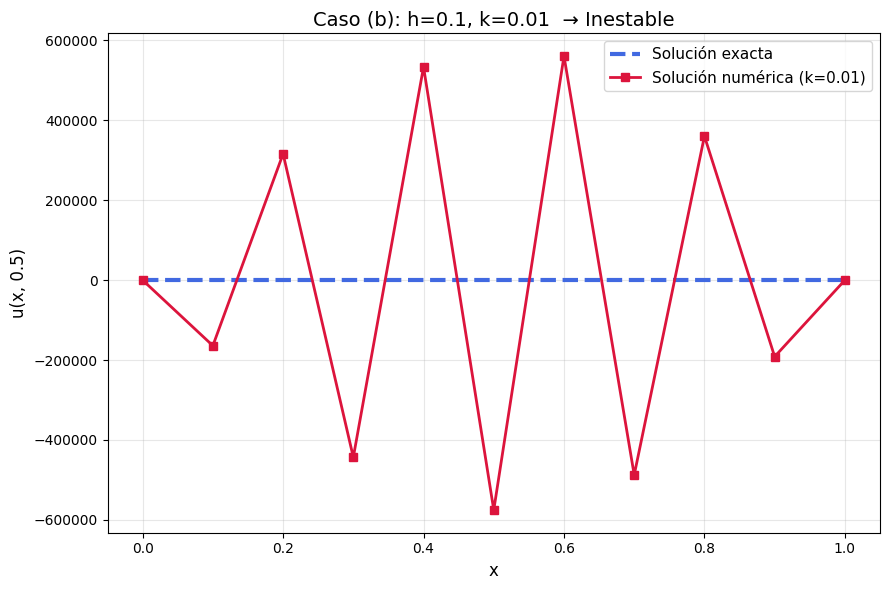


Razón de diferencias:
------------------------
Para h = 0.1, k = 0.0005: r = 0.05 < 0.5 ⇒ estable.
Para h = 0.1, k = 0.01: r = 1.00 > 0.5 ⇒ inestable.
El método explícito requiere que r ≤ 0.5 para estabilidad numérica.
Cuando k es demasiado grande (caso b), la solución diverge rápidamente,
lo que genera errores grandes como se observa en la primera grafica compartiva.



In [6]:
# ==============================================================
# ECUACIÓN DEL CALOR  "MÉTODO DE DIFERENCIAS PROGRESIVAS"
# ==============================================================

# ∂u/∂t = ∂²u/∂x²,   0 < x < 1,  t > 0
# Condiciones de frontera:
#   u(0, t) = u(1, t) = 0
# Condición inicial:
#   u(x, 0) = sin(pi * x)
# Solución analítica:
#   u(x, t) = exp(-pi^2 * t) * sin(pi * x)
# ==============================================================
# Objetivo:
#   a) Calcular la solución numérica para:
#        a) h = 0.1, k = 0.0005  (estable)
#        b) h = 0.1, k = 0.01    (inestable)
#   b) Comparar con la solución exacta en t = 0.5
#   c) Mostrar tabla y gráficas comparativas
#   d) Comentar la razón de las diferencias al variar h y k
# ==============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# Función: Metodo de difrencias progresivas hacia adelante
# --------------------------------------------------------------
def calor_explicito(h, k, t_final):
    """
    Calcula la solución numérica de la ecuación del calor
    usando diferencias progresivas hacia adelante.

    Parámetros:
        h : paso espacial
        k : paso temporal
        t_final : tiempo final

    Retorna:
        x : malla espacial
        u : solución numérica en t_final
        r : parámetro de estabilidad (k/h^2)
    """
    L = 1.0
    n = int(L / h)
    m = int(t_final / k)
    r = k / (h ** 2)

    # Malla espacial
    x = np.linspace(0, L, n + 1)

    # Condición inicial
    u = np.sin(np.pi * x)
    u_new = np.zeros_like(u)

    # Iteraciones temporales
    for j in range(m):
        for i in range(1, n):
            u_new[i] = u[i] + r * (u[i + 1] - 2 * u[i] + u[i - 1])
        u_new[0], u_new[-1] = 0, 0  # Fronteras
        u[:] = u_new[:]

    return x, u, r

# --------------------------------------------------------------
# Condiciones del problema
# --------------------------------------------------------------
h = 0.1
t_final = 0.5

# Caso (a) estable (según lo resuelto el clase)
k1 = 0.0005
x1, w1, r1 = calor_explicito(h, k1, t_final)

# Caso (b) inestable (según lo resuelto en clase)
k2 = 0.01
x2, w2, r2 = calor_explicito(h, k2, t_final)

# Solución exacta
u_exacta = np.exp(-np.pi**2 * t_final) * np.sin(np.pi * x1)

# --------------------------------------------------------------
# Comparación de soluciónes
# --------------------------------------------------------------
tabla = pd.DataFrame({
    'x_i': x1,
    'u(x_i,0.5)': u_exacta,
    f'w_i (k={k1})': w1,
    f'|Error| (k={k1})': np.abs(u_exacta - w1),
    f'w_i (k={k2})': w2,
    f'|Error| (k={k2})': np.abs(u_exacta - w2)
})

print("===============================================")
print(" Comparación de soluciones numéricas y exactas ")
print("===============================================")
print(tabla.to_string(index=False))

# --------------------------------------------------------------
# 1️ .- Gráfica comparativa general a), b) ,solcuión exacta
# --------------------------------------------------------------
plt.figure(figsize=(9,6))
plt.plot(x1, u_exacta, color='royalblue', linestyle='--', linewidth=3, label='Solución exacta')
plt.plot(x1, w1, color='limegreen', marker='o', linestyle='-', linewidth=2, label=f'Numérica (k={k1}, estable)')
plt.plot(x2, w2, color='crimson', marker='s', linestyle='-', linewidth=2, label=f'Numérica (k={k2}, inestable)')
plt.title('Comparación general entre soluciones numéricas y analítica', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x, 0.5)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# 2.- Gráfica solo del inciso (a): k=0.0005 (estable)
# --------------------------------------------------------------
plt.figure(figsize=(9,6))
plt.plot(x1, u_exacta, color='royalblue', linestyle='--', linewidth=3, label='Solución exacta')
plt.plot(x1, w1, color='limegreen', marker='o', linestyle='-', linewidth=2, label=f'Solución numérica (k={k1})')
plt.title(f'Caso (a): h={h}, k={k1}  → Estable', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x, 0.5)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# 3.- Gráfica solo del inciso (b): k=0.01 (inestable)
# --------------------------------------------------------------
plt.figure(figsize=(9,6))
plt.plot(x1, u_exacta, color='royalblue', linestyle='--', linewidth=3, label='Solución exacta')
plt.plot(x2, w2, color='crimson', marker='s', linestyle='-', linewidth=2, label=f'Solución numérica (k={k2})')
plt.title(f'Caso (b): h={h}, k={k2}  → Inestable', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x, 0.5)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# Comentario final
# --------------------------------------------------------------
print("\nRazón de diferencias:")
print("------------------------")
print(f"Para h = {h}, k = {k1}: r = {r1:.2f} < 0.5 ⇒ estable.")
print(f"Para h = {h}, k = {k2}: r = {r2:.2f} > 0.5 ⇒ inestable.")
print("El método explícito requiere que r ≤ 0.5 para estabilidad numérica.")
print("Cuando k es demasiado grande (caso b), la solución diverge rápidamente,")
print("lo que genera errores grandes como se observa en la primera grafica compartiva.\n")
